In [1]:
!pip install numpy pandas matplotlib tensorflow keras scikit-learn opencv-python


Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 10.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.8 MB 9.1 MB/s eta 0:00:05
   ---- ----------------------------------- 3.9/38.8 MB 9.8 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/38.8 MB 9.6 MB/s eta 0:00:04
   -------- ------------------------------- 7.9/38.8 MB 9.7 MB/s eta 0:00:04
   ---------- ----------------------------- 10.5/38.8 MB 10.2 MB/s eta 0:00:03
   ------------ ---------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Enigma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define class labels
EMOTION_LABELS = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

# Function to load data
def load_fer_data(base_path):
    images = []
    labels = []
    for emotion, label in EMOTION_LABELS.items():
        emotion_folder = os.path.join(base_path, emotion)
        for img_file in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale
            img = cv2.resize(img, (48, 48))  # Resize to 48x48
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing data
train_path = "Dataset/train"
test_path = "Dataset/test"

X_train, y_train = load_fer_data(train_path)
X_test, y_test = load_fer_data(test_path)

# Normalize the pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for the CNN (add channel dimension)
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_emotion_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # 7 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_emotion_model()


C:\Users\Enigma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=64
)


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.2561 - loss: 1.8056 - val_accuracy: 0.3756 - val_loss: 1.5811
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 199ms/step - accuracy: 0.3897 - loss: 1.5785 - val_accuracy: 0.4454 - val_loss: 1.4366
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4372 - loss: 1.4602 - val_accuracy: 0.4731 - val_loss: 1.3757
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.4638 - loss: 1.3953 - val_accuracy: 0.4876 - val_loss: 1.3406
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.4821 - loss: 1.3554 - val_accuracy: 0.5046 - val_loss: 1.2853
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.4971 - loss: 1.3112 - val_accuracy: 0.5145 - val_loss: 1.2662
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.5185 - loss: 1.2629 - val_accuracy: 0.5202 - val_loss: 1.2408
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.5295 - loss: 1.2325 

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


159/225 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4754 - loss: 1.3904

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.5005 - loss: 1.3307
Test Accuracy: 57.04%


In [9]:
# Save the trained model
model.save("emotion_detection_model.h5")


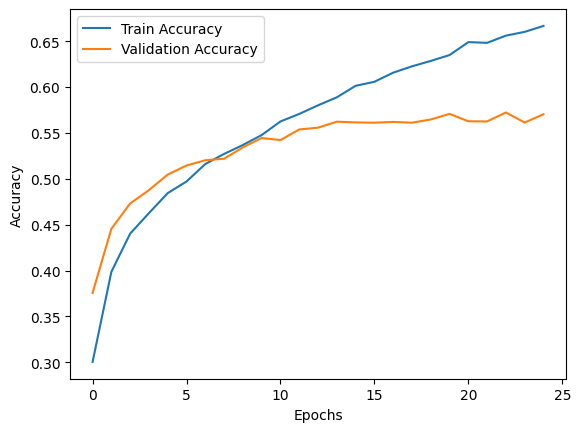

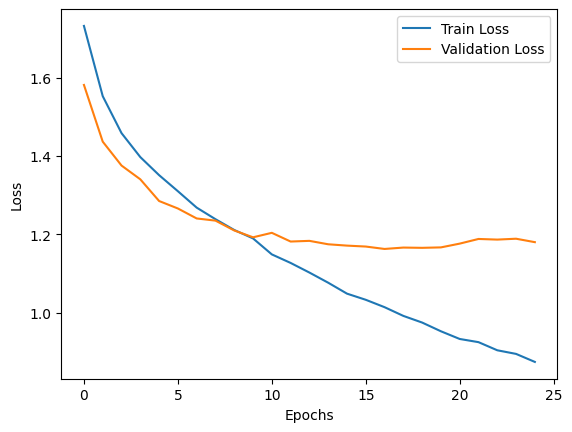

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
